In [1]:
from astropy.io import fits 
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import proj_plane_pixel_scales, skycoord_to_pixel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.vizier import Vizier

from astrosceni.stars_filter import StarsFilter
from astrosceni.contour import Contour
from astrosceni.image import Image

#Initialize classes
filter = StarsFilter()
NB = Image()

#load data into Image class, crop image
NB.load("data/rim_Ha_wcs.fits")
NB.cropPixels(x_end=-30, y_start=30)

In [2]:
#Region was not defined (OPTIONAL), so all stars within image will be returned
#Set apparent magnitude limit (OPTIONAL), only visible stars with apparent magnitude > 1 will be returned
filter.set_mag_limit(8, None)
filter.set_visible_stars(NB)

#Obtain the shortened list of stars from the catalogue, the last two columns of the dataframe are ['x_pixels'] and ['y_pixels'] corresponding to given image
filteredStars = filter.get_visible_stars()

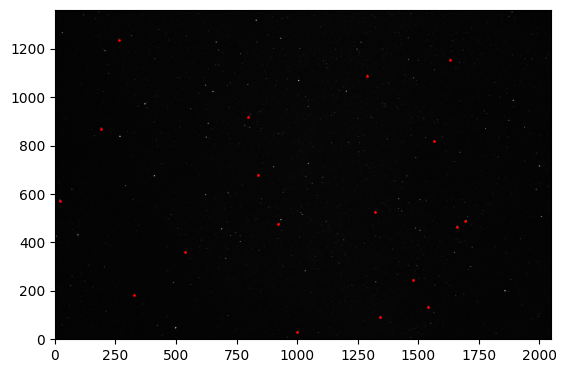

In [3]:
#Plot showing stars imaged onto image (CROPPED DATA)
plt.imshow(NB.getImageData(original = False), origin='lower', cmap = 'gray')
plt.scatter(filteredStars['x_pixels'], filteredStars['y_pixels'], s=1, color = 'red')
plt.show()

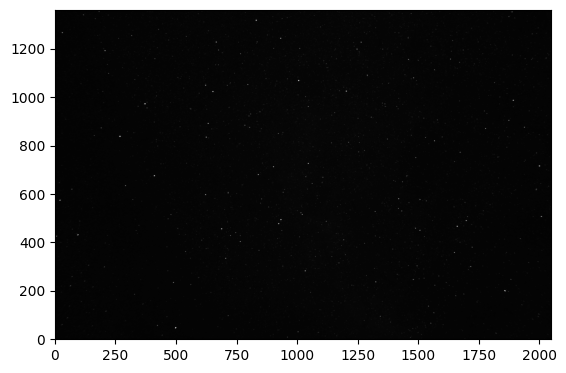

In [4]:
#plot showing default image
plt.imshow(NB.getImageData(original = False), origin='lower', cmap='gray')
plt.show()

In [5]:
#Prints list of visible stars, and the shape of the dataframe. Rows is number of stars
print(filteredStars)
print(filteredStars.shape)

         HIP        RAhms        DEdms   Vmag      RAICRS     DEICRS  \
90471  90552  18 28 36.68  -12 59 50.8   8.34  277.152825 -12.997439   
90479  90560  18 28 45.18  -14 11 21.6   9.16  277.188237 -14.189326   
90491  90572  18 28 53.51  -12 57 36.6   8.20  277.222977 -12.960158   
90532  90613  18 29 23.88  -13 35 54.2   8.45  277.349486 -13.598380   
90580  90661  18 29 55.21  -12 23 22.0   9.19  277.480051 -12.389439   
90618  90701  18 30 19.30  -12 35 28.5   8.88  277.580423 -12.591252   
90701  90784  18 31 17.66  -14 06 50.3   8.75  277.823597 -14.113970   
90708  90791  18 31 19.75  -13 06 29.4   9.88  277.832282 -13.108170   
90715  90798  18 31 23.05  -12 20 16.7   9.48  277.846054 -12.337972   
90920  91003  18 33 53.11  -12 15 46.3   9.54  278.471284 -12.262870   
90954  91037  18 34 15.76  -13 03 53.4   8.24  278.565680 -13.064820   
91006  91089  18 34 47.18  -13 26 05.1   8.09  278.696602 -13.434750   
91017  91100  18 34 57.57  -13 52 12.4   9.52  278.739878 -13.87